In [1]:
import pandas as pd
df = pd.read_csv('SILKYSKY_DATA_CW2 (F).csv',encoding = 'latin1')
df.head(10)

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,Y,13,Under 18,Personal Travel,Eco Plus,4760,India,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,Republic of Ireland,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,4760,India,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,560,Norway,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,Y,61,55 to 64,Business travel,Business,4760,India,...,5,3,3,4,4,3,3,3,0,0.0
5,5,111157,Female,Y,26,25 to 34,Personal Travel,Eco,1180,Italy,...,1,1,3,4,4,4,4,1,0,0.0
6,6,82113,Male,Y,47,45 to 54,Personal Travel,Eco,4760,India,...,2,2,3,3,4,3,5,2,9,23.0
7,7,96462,Female,Y,52,45 to 54,Business travel,Business,4760,India,...,5,5,5,5,5,4,5,4,4,0.0
8,8,79485,Female,Y,41,35 to 44,Business travel,Business,4760,India,...,3,1,1,2,1,4,1,2,0,0.0
9,9,65725,Male,N,20,18 to 24,Business travel,Eco,1060,San Marino,...,3,2,2,3,4,4,3,2,0,0.0


In [35]:
# Filter satisfied customers
satisfied_customers = df[df['Satisfied'] == 'Y']

# Count by gender
gender_counts = satisfied_customers['Gender'].value_counts()

print(gender_counts)

Gender
Male      42463
Female    42457
Name: count, dtype: int64


In [39]:
# Is there any null value in the dataset
df.isnull().sum()

Ref                                    0
id                                     0
Gender                                 0
Satisfied                              0
Age                                    0
Age Band                               0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Destination                            0
Continent                              0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness     

In [51]:
# duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [55]:
# filling na valuse with mean of other valuse in the same column
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

In [57]:
df.isnull().sum()

Ref                                  0
id                                   0
Gender                               0
Satisfied                            0
Age                                  0
Age Band                             0
Type of Travel                       0
Class                                0
Flight Distance                      0
Destination                          0
Continent                            0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minute

In [59]:
# Filter only satisfied customers
satisfied_df = df[df['Satisfied'] == 'Y']  # Or adjust to match your 'satisfied' values

# Group by gender and calculate average age of satisfied customers
avg_age_by_gender = satisfied_df.groupby('Gender')['Age'].mean()

print(avg_age_by_gender)

Gender
Female    41.378030
Male      41.406872
Name: Age, dtype: float64


In [61]:
# Filter only unsatisfied customers
satisfied_df = df[df['Satisfied'] == 'N']  # Or adjust to match your 'satisfied' values

# Group by gender and calculate average age of unsatisfied customers 
avg_age_by_gender = satisfied_df.groupby('Gender')['Age'].mean()

print(avg_age_by_gender)

Gender
Female    30.43593
Male      30.30583
Name: Age, dtype: float64


In [5]:
# Filter unsatisfied customers
satisfied_customers = df[df['Satisfied'] == 'N']

# Count of unsatisfied customers by gender
gender_counts = satisfied_customers['Gender'].value_counts()

print(gender_counts)

Gender
Female    10270
Male       8714
Name: count, dtype: int64


In [7]:
# Filter only satisfied customers
satisfied_df = df[df['Satisfied'] == 'N']  # Or adjust to match your 'satisfied' values

# Group by gender and filter highest age of unsatified customer
avg_age_by_gender = satisfied_df.groupby('Gender')['Age'].max()

print(avg_age_by_gender)

Gender
Female    85
Male      85
Name: Age, dtype: int64


In [9]:
# Filter only satisfied customers
satisfied_df = df[df['Satisfied'] == 'N']  # Or adjust to match your 'satisfied' values

# Group by gender and calculate average age
avg_age_by_gender = satisfied_df.groupby('Gender')['Age'].min()

print(avg_age_by_gender)

Gender
Female    7
Male      7
Name: Age, dtype: int64


In [11]:
# from which country does the most satified customers we have 
satisfied_customers = df[df['Satisfied'] == 'Y']

# Count satisfied customers by destination
destination_counts = satisfied_customers['Destination'].value_counts()

# Get destination with most satisfied customers
most_satisfied_destination = destination_counts.idxmax()
most_satisfied_count = destination_counts.max()

print(f"The destination with the most satisfied customers is '{most_satisfied_destination}' with {most_satisfied_count} customers.")


The destination with the most satisfied customers is 'India' with 68648 customers.


In [13]:
# from which country does the most unsatified customers we have
unsatisfied_customers = df[df['Satisfied'] == 'N']

# Count satisfied customers by destination
destination_counts = unsatisfied_customers['Destination'].value_counts()

# Get destination with most satisfied customers
most_unsatisfied_destination = destination_counts.idxmax()
most_unsatisfied_count = destination_counts.max()

print(f"The destination with the most unsatisfied customers is '{most_unsatisfied_destination}' with {most_unsatisfied_count} customers.")


The destination with the most unsatisfied customers is 'India' with 15284 customers.


In [95]:
#total satisfied and unsatisfied customers: 
total_satified = df[df['Satisfied']== 'Y'].value_counts().sum()
total_unsatified = df[df['Satisfied']== 'N'].value_counts().sum()
print(f"total satifeid customers are:{total_satified}")
print(f"total satifeid customers are:{total_unsatified}")

total satifeid customers are:84920
total satifeid customers are:18984


In [97]:
# Count values in 'satisfied' column
satisfaction_counts = df['Satisfied'].value_counts()

# Get counts (adjust these strings to match your data exactly)
num_satisfied = satisfaction_counts.get('Y', 0)
num_unsatisfied = satisfaction_counts.get('N', 0)

# Calculate ratio
if num_unsatisfied != 0:
    ratio = num_satisfied / num_unsatisfied
    print(f"Satisfied to Unsatisfied Ratio: {ratio:.2f} : 1")
else:
    print("There are no unsatisfied customers — ratio is undefined or infinite.")

Satisfied to Unsatisfied Ratio: 4.47 : 1


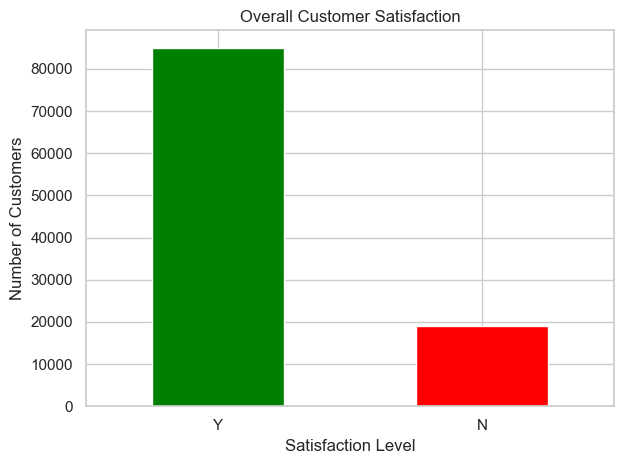

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Count satisfied vs. unsatisfied customers
satisfaction_counts = df['Satisfied'].value_counts()

# Plot bar chart
satisfaction_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Overall Customer Satisfaction')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [15]:
# basic info of all numeric values
# Select relevant numeric columns
numeric_cols = [
    'Age',
    'Flight Distance',
    'Departure Delay in Minutes',
    'Arrival Delay in Minutes'
]

# Display basic descriptive statistics
descriptive_stats = df[numeric_cols].describe()
print("Basic Descriptive Statistics:")
print(descriptive_stats)

Basic Descriptive Statistics:
                 Age  Flight Distance  Departure Delay in Minutes  \
count  103904.000000    103904.000000               103904.000000   
mean       39.379706      4164.071066                   14.818390   
std        15.114964      1346.755749                   38.313911   
min         7.000000       235.000000                    0.000000   
25%        27.000000      4760.000000                    0.000000   
50%        40.000000      4760.000000                    0.000000   
75%        51.000000      4760.000000                   12.000000   
max        85.000000      5940.000000                 1592.000000   

       Arrival Delay in Minutes  
count             103594.000000  
mean                  15.181275  
std                   38.774453  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                   13.000000  
max                 1584.000000  


In [17]:
# --- Cross-tabulation ---

# Satisfaction vs Gender
gender_satisfaction = pd.crosstab(df['Gender'], df['Satisfied'], normalize='index') * 100
print("Satisfaction by Gender (%):\n", gender_satisfaction)

# Satisfaction vs Type of Travel
travel_satisfaction = pd.crosstab(df['Type of Travel'], df['Satisfied'], normalize='index') * 100
print("\nSatisfaction by Type of Travel (%):\n", travel_satisfaction)

# Satisfaction vs Class
class_satisfaction = pd.crosstab(df['Class'], df['Satisfied'], normalize='index') * 100
print("\nSatisfaction by Class (%):\n", class_satisfaction)

# Satisfaction vs Age Band
ageband_satisfaction = pd.crosstab(df['Age Band'], df['Satisfied'], normalize='index') * 100
print("\nSatisfaction by Age Band (%):\n", ageband_satisfaction)


Satisfaction by Gender (%):
 Satisfied          N          Y
Gender                         
Female     19.477687  80.522313
Male       17.027180  82.972820

Satisfaction by Type of Travel (%):
 Satisfied                N          Y
Type of Travel                       
Business travel  26.263345  73.736655
Personal Travel   0.511644  99.488356

Satisfaction by Class (%):
 Satisfied          N          Y
Class                          
Business   14.815262  85.184738
Eco        23.341534  76.658466
Eco Plus    9.540966  90.459034

Satisfaction by Age Band (%):
 Satisfied           N          Y
Age Band                        
18 to 24    46.920229  53.079771
25 to 34    30.654566  69.345434
35 to 44    17.636333  82.363667
45 to 54     5.699748  94.300252
55 to 64     3.917804  96.082196
65 or over   4.465038  95.534962
Under 18    14.147018  85.852982


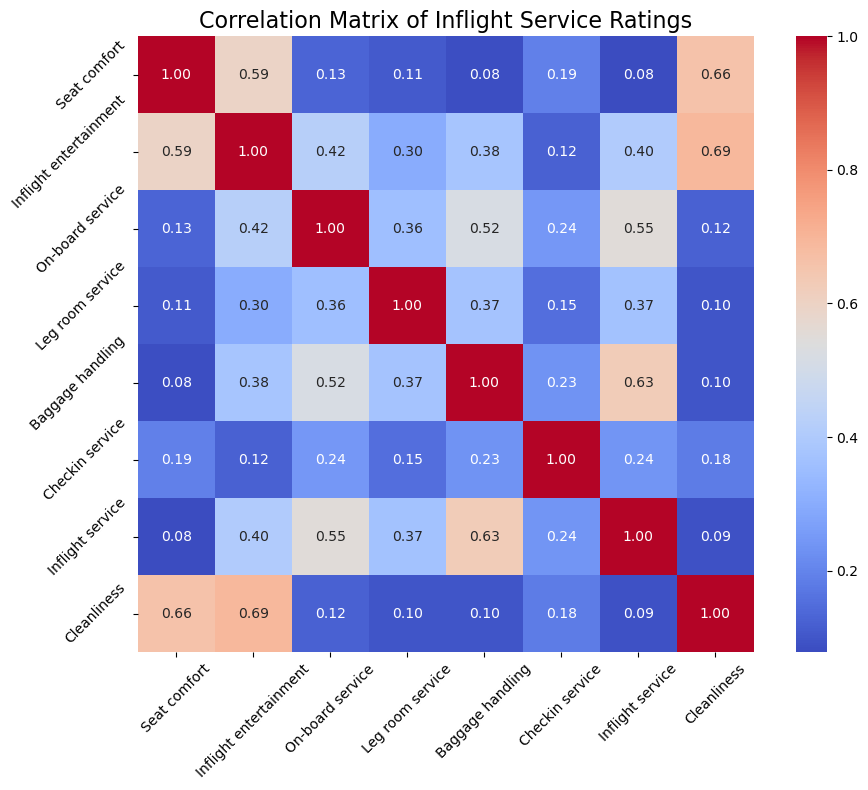

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of service rating columns
service_cols = [
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness'
]

# Compute correlation matrix
corr_matrix = df[service_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Inflight Service Ratings', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


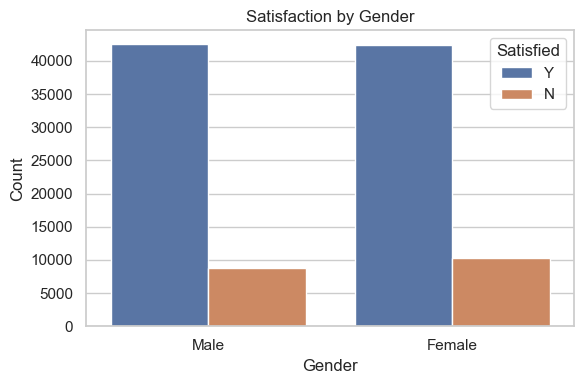

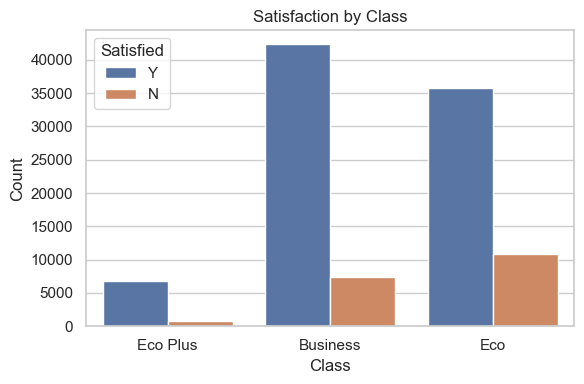

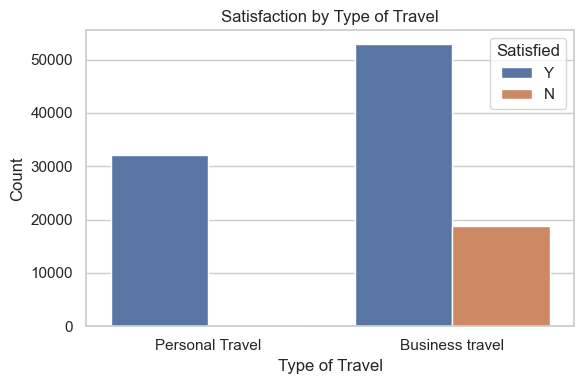

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Plot: Satisfaction by Gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', hue='Satisfied')
plt.title('Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Satisfied')
plt.tight_layout()
plt.show()

# Plot: Satisfaction by Class
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Class', hue='Satisfied')
plt.title('Satisfaction by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Satisfied')
plt.tight_layout()
plt.show()

# Plot: Satisfaction by Type of Travel
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Type of Travel', hue='Satisfied')
plt.title('Satisfaction by Type of Travel')
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.legend(title='Satisfied')
plt.tight_layout()
plt.show()


C:\Users\muhib\AppData\Local\Temp\ipykernel_11784\3747247412.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Satisfied', y='Age', palette='Set2')


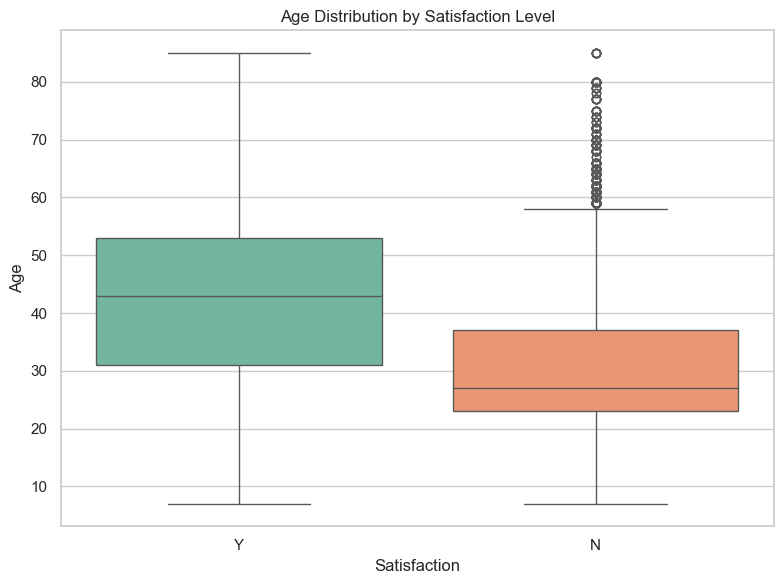

C:\Users\muhib\AppData\Local\Temp\ipykernel_11784\3747247412.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Class', y='Flight Distance', palette='Set3')


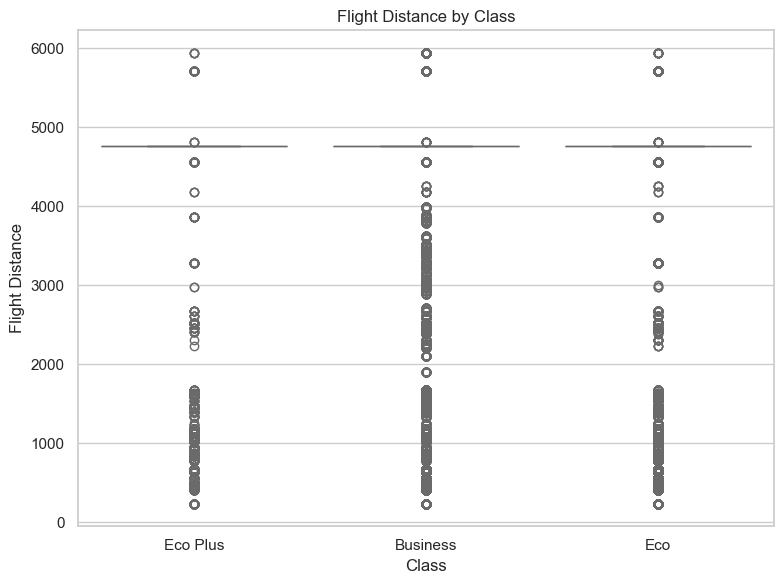

C:\Users\muhib\AppData\Local\Temp\ipykernel_11784\3747247412.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Type of Travel', y='Flight Distance', palette='coolwarm')


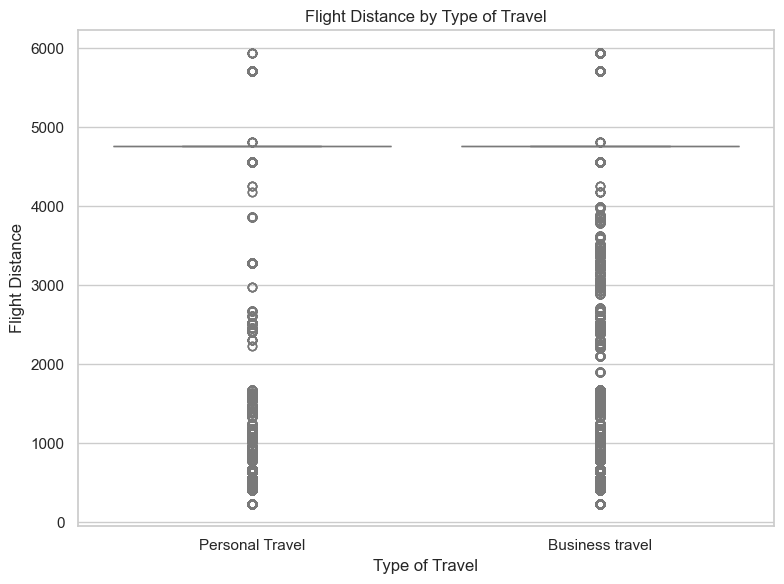

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for better visuals
sns.set(style="whitegrid")

# Box Plot: Age vs Satisfaction
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Satisfied', y='Age', palette='Set2')
plt.title('Age Distribution by Satisfaction Level')
plt.xlabel('Satisfaction')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

# Box Plot: Flight Distance vs Class
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Class', y='Flight Distance', palette='Set3')
plt.title('Flight Distance by Class')
plt.xlabel('Class')
plt.ylabel('Flight Distance')
plt.tight_layout()
plt.show()

# Box Plot: Flight Distance vs Type of Travel
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Type of Travel', y='Flight Distance', palette='coolwarm')
plt.title('Flight Distance by Type of Travel')
plt.xlabel('Type of Travel')
plt.ylabel('Flight Distance')
plt.tight_layout()
plt.show()


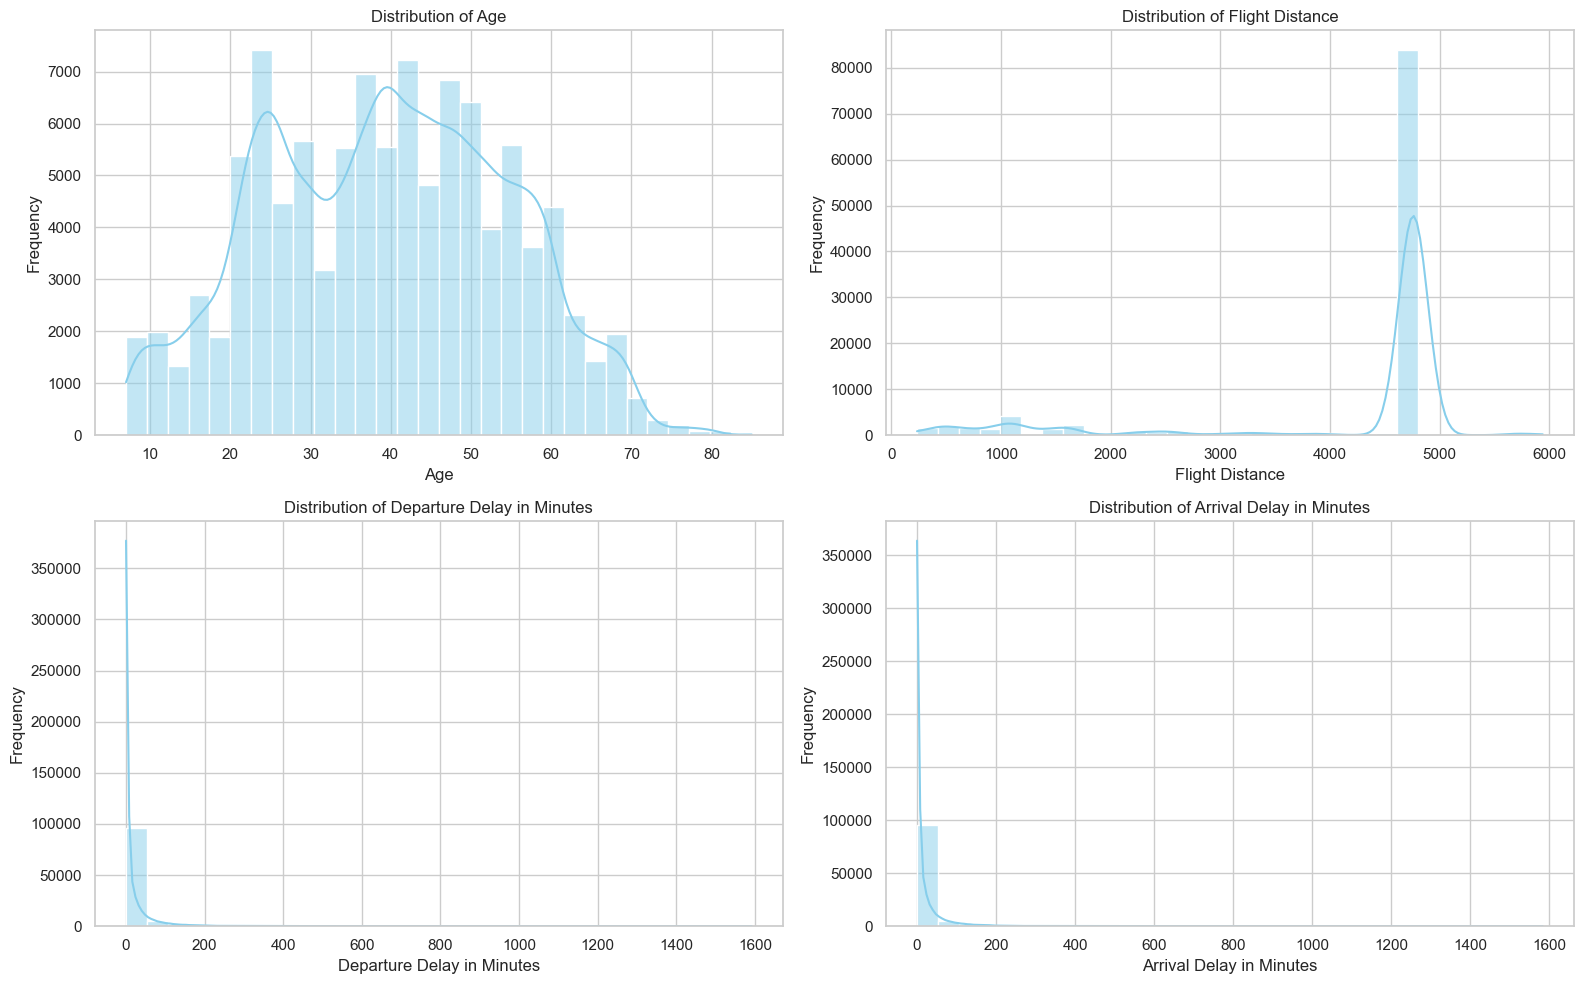

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set Seaborn style
sns.set(style="whitegrid")

# List of numerical columns to plot
num_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Create histograms
plt.figure(figsize=(16, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


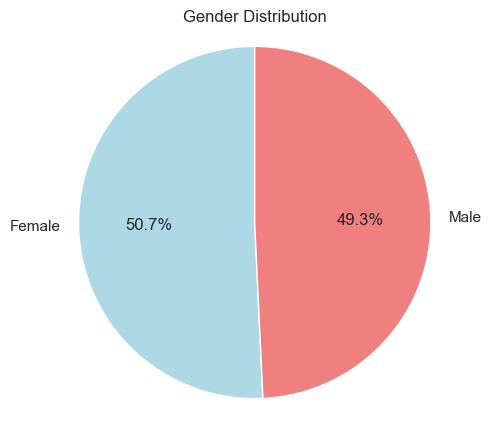

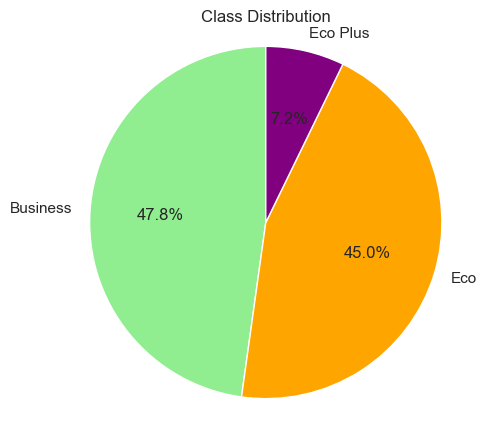

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pie chart for the Gender distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

# Create a pie chart for the Class distribution
class_counts = df['Class'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'orange', 'purple'])
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()
